In [1]:
import pandas as pd

# load datasets
df_train = pd.read_csv('../../preprocessing/datasets/25K_tracks_features_and_labels_for_training.csv')
df_test = pd.read_csv('../../preprocessing/datasets/25K_tracks_features_and_labels_for_test.csv')

# don't need to seperate them since we will use pyCaret
df_union = pd.concat([df_train, df_test], ignore_index=True)

In [2]:
df_union.columns

Index(['Unnamed: 0', 'track_id', 'track_genre_top', 'artist_name',
       'track_title', 'set_split', 'set_subset', 'tempo', 'rms_harmonic_mean',
       'rms_harmonic_var', 'rms_percussive_mean', 'rms_percussive_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_rolloff_mean', 'spectral_rolloff_var', 'zero_crossings',
       'chroma_stft_0_mean', 'chroma_stft_1_mean', 'chroma_stft_2_mean',
       'chroma_stft_3_mean', 'chroma_stft_4_mean', 'chroma_stft_5_mean',
       'chroma_stft_6_mean', 'chroma_stft_7_mean', 'chroma_stft_8_mean',
       'chroma_stft_9_mean', 'chroma_stft_10_mean', 'chroma_stft_11_mean',
       'chroma_stft_0_var', 'chroma_stft_1_var', 'chroma_stft_2_var',
       'chroma_stft_3_var', 'chroma_stft_4_var', 'chroma_stft_5_var',
       'chroma_stft_6_var', 'chroma_stft_7_var', 'chroma_stft_8_var',
       'chroma_stft_9_var', 'chroma_stft_10_var', 'chroma_stft_11_var',
       'MFCC_1_mean', 'MFCC_2_mean', 'MFCC_3_mean', 'MFCC_4_mean',
       

In [3]:
# define features and label
features = [feature for feature in df_union.columns if feature not in ['Unnamed: 0', 'track_id', 'track_genre_top', 'depth_2_genre_name',
       'depth_3_genre_name', 'depth_4_genre_name', 'depth_5_genre_name',
       'artist_name', 'track_title', 'set_split', 'set_subset']]
label = 'track_genre_top'

In [4]:
df_union['track_genre_top'].value_counts()

Rock                   6387
Electronic             5680
Experimental           2025
Hip-Hop                1977
Folk                   1366
Instrumental           1218
Pop                    1064
International           916
Classical               557
Old-Time / Historic     459
Jazz                    345
Country                 160
Soul-RnB                136
Spoken                  106
Blues                    66
Easy Listening           19
Name: track_genre_top, dtype: int64

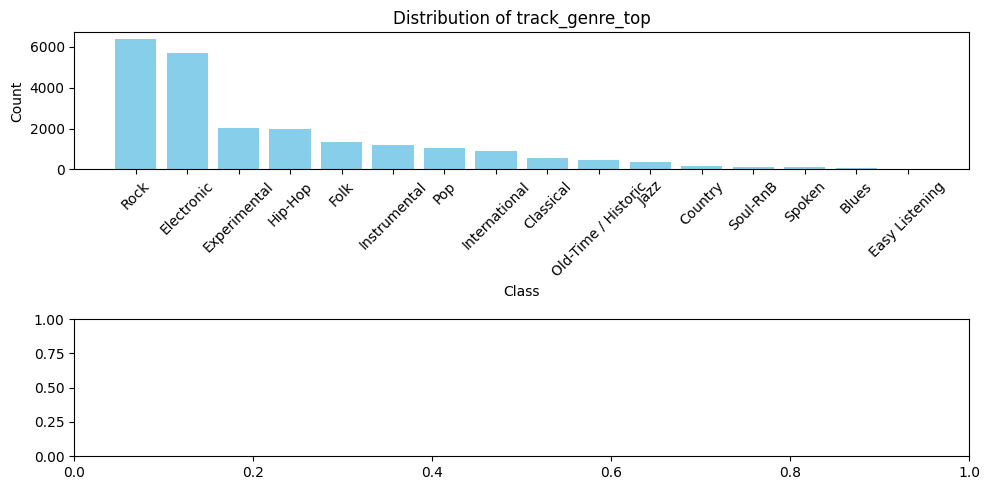

In [8]:

# to check if the dataset is balanced.
import matplotlib.pyplot as plt

def plot_value_counts(ax, column_name, df):
    value_counts = df[column_name].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

columns_to_plot = ['track_genre_top']

# Create a figure and a 5x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

for ax, column in zip(axes, columns_to_plot):
    plot_value_counts(ax, column, df_union)

plt.tight_layout()  # Adjust layout for better visibility
plt.show()

In [4]:
# remove the value counts() are smaller then 30
# MIN_NUM = 30

# value_counts = merged_df['depth_1_genre_name'].value_counts()

# Get a list of values that have a count less than 30
# to_remove = value_counts[value_counts < MIN_NUM].index

# Filter the DataFrame
# merged_df = merged_df[~merged_df['depth_5_genre_name'].isin(to_remove)]

In [9]:
# Filter columns
used_columns = [label] + features

# Update merged_df with filtered columns and drop NaN rows
df_union = df_union[used_columns]

In [10]:
df_union

,track_genre_top,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,...,MFCC_11_var,MFCC_12_var,MFCC_13_var,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var
0,Hip-Hop,161.499023,0.060801,0.000606,0.102429,0.006546,2975.279504,9.329318e+05,6088.350559,2.180362e+06,...,87.048584,114.947840,75.481260,65.706130,53.539734,50.610130,53.584140,53.726870,53.249638,41.468660
1,Hip-Hop,86.132812,0.068484,0.001239,0.065604,0.002172,2758.702053,7.728350e+05,5681.876212,2.165383e+06,...,51.888680,64.369890,69.203100,68.990480,61.594390,52.908260,64.763330,48.977910,51.463720,43.103836
2,Hip-Hop,99.384014,0.079553,0.002230,0.085417,0.003846,2361.216888,7.092386e+05,5326.953068,2.415460e+06,...,98.111730,72.858490,89.889824,56.416400,56.527650,66.605540,45.467102,44.914455,65.224960,65.556360
3,Pop,112.347147,0.135624,0.000600,0.081036,0.003281,2319.325849,1.273302e+05,4256.393704,5.828485e+05,...,43.031660,35.306570,33.088593,31.829184,31.379726,46.397903,32.052837,46.061210,31.413872,32.891766
4,Hip-Hop,135.999178,0.088261,0.001123,0.094477,0.003812,2378.782197,8.972040e+05,4994.820480,3.289453e+06,...,74.750595,65.041580,55.827350,49.834393,56.149130,53.382088,54.343760,44.785503,42.397964,43.048054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,Hip-Hop,129.199219,0.052490,0.000417,0.017636,0.001264,1024.151417,1.247926e+06,2228.936329,5.700566e+06,...,39.679830,66.674750,78.424934,69.882160,76.793610,137.782790,129.696660,125.003845,206.811680,171.720430
22477,Hip-Hop,99.384014,0.044508,0.000424,0.022598,0.000618,2250.980114,1.250727e+06,4496.251054,4.279378e+06,...,80.676285,74.258675,111.653180,87.112960,71.073960,67.151290,43.691220,34.878120,54.123210,81.817670
22478,Hip-Hop,129.199219,0.043216,0.002003,0.053547,0.009923,2426.486019,1.350575e+06,4994.368767,4.223903e+06,...,43.119890,71.484940,42.183258,80.406620,28.718090,98.743250,52.350940,97.176070,155.288510,107.271194
22479,Hip-Hop,129.199219,0.050994,0.001255,0.028848,0.002533,1622.445163,5.140070e+05,3138.568602,2.570738e+06,...,59.512333,93.917450,55.204662,78.926650,53.803130,93.909966,89.111946,108.913440,68.131960,68.179535


In [15]:
from pycaret.classification import *
from imblearn.over_sampling import ADASYN

In [12]:
exp_clf = setup(data = df_union, target = label, fix_imbalance=True, fix_imbalance_method=ADASYN(), session_id=123, normalize=True) 

,Description,Value
0,Session id,123
1,Target,track_genre_top
2,Target type,Multiclass
3,Target mapping,"Blues: 0, Classical: 1, Country: 2, Easy Listening: 3, Electronic: 4, Experimental: 5, Folk: 6, Hip-Hop: 7, Instrumental: 8, International: 9, Jazz: 10, Old-Time / Historic: 11, Pop: 12, Rock: 13, Soul-RnB: 14, Spoken: 15"
4,Original data shape,"(22481, 75)"
5,Transformed data shape,"(78281, 75)"
6,Transformed train set shape,"(71536, 75)"
7,Transformed test set shape,"(6745, 75)"
8,Numeric features,74
9,Preprocess,True


In [13]:
compare_models()

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6086,0.8874,0.6086,0.6020,0.6040,0.5248,0.5250
1,0.5934,0.8813,0.5934,0.5886,0.5887,0.5062,0.5065
2,0.6188,0.8930,0.6188,0.6148,0.6132,0.5346,0.5352
3,0.6220,0.8952,0.6220,0.6130,0.6164,0.5411,0.5413
4,0.5921,0.8883,0.5921,0.5848,0.5869,0.5048,0.5050
5,0.6118,0.8935,0.6118,0.6009,0.6032,0.5262,0.5267
6,0.6052,0.8844,0.6052,0.5979,0.5992,0.5190,0.5193
7,0.6027,0.8835,0.6027,0.5933,0.5957,0.5169,0.5172
8,0.6128,0.8946,0.6128,0.6047,0.6064,0.5301,0.5303


In [25]:
print(model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [26]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8159,0.9644,0.8159,0.8123,0.8023,0.7616,0.7637
1,0.8222,0.9674,0.8222,0.8211,0.8105,0.7698,0.7719
2,0.8170,0.9682,0.8170,0.8151,0.8035,0.7630,0.7654
3,0.8233,0.9652,0.8233,0.8211,0.8107,0.7715,0.7734
4,0.8104,0.9637,0.8104,0.8034,0.7963,0.7544,0.7565
5,0.8200,0.9666,0.8200,0.8174,0.8051,0.7669,0.7691
6,0.8137,0.9651,0.8137,0.8107,0.7997,0.7577,0.7606
7,0.8167,0.9673,0.8167,0.8145,0.8035,0.7621,0.7647
8,0.8081,0.9611,0.8081,0.8088,0.7965,0.7510,0.7534


Fitting 10 folds for each of 10 candidates, totalling 100 fits


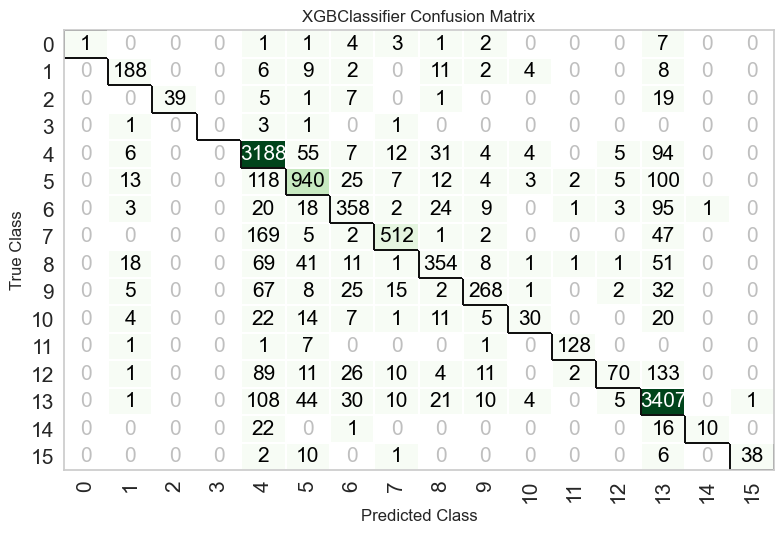

In [27]:
plot_model(tuned_model, plot = 'confusion_matrix')

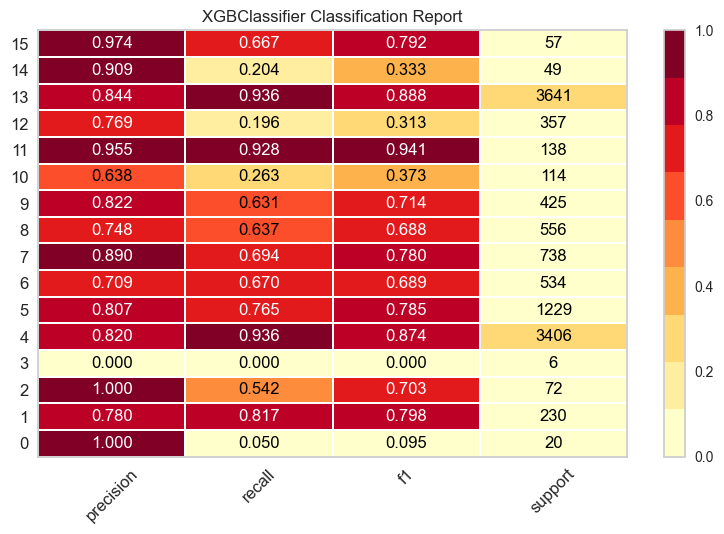

In [28]:
plot_model(tuned_model, plot = 'class_report')

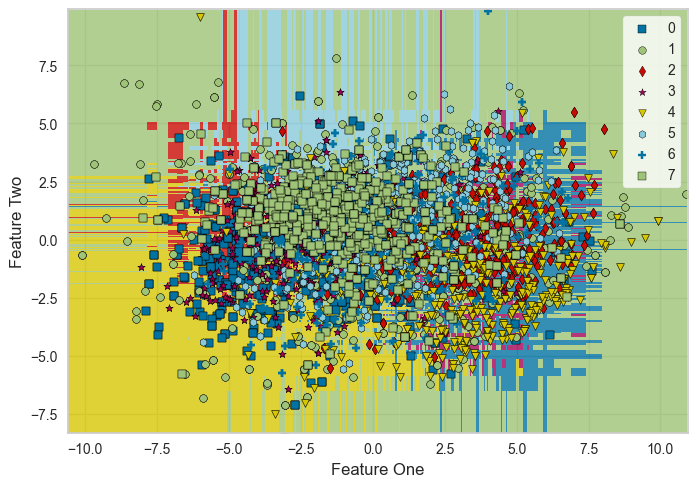

In [19]:
plot_model(tuned_model, plot = 'boundary')

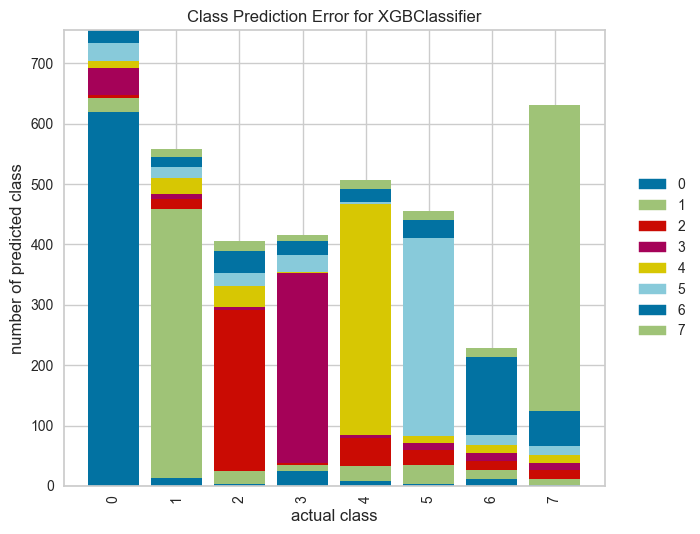

In [20]:
plot_model(tuned_model, plot = 'error')

In [29]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8236,0.9672,0.8236,0.8217,0.8110,0.7714,0.7737


,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,zero_crossings,...,MFCC_14_var,MFCC_15_var,MFCC_16_var,MFCC_17_var,MFCC_18_var,MFCC_19_var,MFCC_20_var,depth_1_genre_name,prediction_label,prediction_score
28342,135.999176,0.063645,0.000568,0.039302,0.000613,2249.473389,6.448032e+05,4656.125488,2415974.500,70441.0,...,55.840355,44.568623,59.734955,56.171310,52.240467,47.632202,47.654766,2,Country,0.8721
26694,135.999176,0.194799,0.005608,0.083758,0.004437,2261.239014,2.450685e+05,4958.808105,1353980.750,53835.0,...,69.171234,58.583035,68.754257,63.496525,59.543884,66.071152,100.557510,4,Electronic,0.9704
1113,112.347145,0.115194,0.002466,0.063314,0.002232,1497.949707,8.959066e+05,3146.716553,5173722.000,35823.0,...,103.900406,78.956596,83.962662,70.314964,66.761192,69.690887,62.982117,7,Electronic,0.3845
33751,161.499023,0.297889,0.009448,0.065381,0.001388,2952.933838,2.432077e+05,6879.007812,631100.125,51331.0,...,16.866835,18.185503,18.351131,18.702236,21.923414,30.489943,20.309271,4,Electronic,0.9819
563,112.347145,0.090331,0.002099,0.021750,0.000311,802.702209,2.380614e+05,1374.536133,1404603.500,17227.0,...,46.260990,44.145203,48.026100,43.462322,49.761047,74.214821,44.050076,6,Folk,0.9671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30140,161.499023,0.058701,0.000529,0.014935,0.000149,2088.070068,2.989102e+05,5017.778320,2569761.500,52477.0,...,39.009647,42.502209,43.178490,36.077847,49.411835,70.451424,75.752342,9,International,0.9699
14813,143.554688,0.205899,0.003091,0.113956,0.002720,2506.543213,3.621081e+05,4986.387695,942566.250,82193.0,...,24.183264,18.968136,22.438276,23.635452,21.141533,23.598059,19.793045,4,Rock,0.9650
10356,135.999176,0.122270,0.007806,0.140851,0.007574,3037.302734,1.351909e+06,5951.695801,2961266.500,106817.0,...,90.415329,82.682426,63.923611,62.079903,57.041279,56.334789,69.153732,7,Hip-Hop,0.9897
32387,129.199219,0.187462,0.005815,0.083095,0.001783,1773.997314,1.366952e+06,4122.700195,9116602.000,21553.0,...,50.635517,37.772743,46.343800,40.254559,34.006958,24.020966,31.233156,4,Electronic,0.9705


In [30]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'xgboost_model_25K_74F_231111')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tempo', 'rms_harmonic_mean',
                                              'rms_harmonic_var',
                                              'rms_percussive_mean',
                                              'rms_percussive_var',
                                              'spectral_centroid_mean',
                                              'spectral_centroid_var',
                                              '...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.15,
                                max_bin=None, max_cat_threshold=None,
 